In [3]:
import bmxdata
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft

In [4]:
fname = '/astro/u/anze/bmxdata/raw/1909/ring/190916_225853.ring'
r = bmxdata.BMXRingbuffer(fname)

Loading version: 1
Ncards: 2 Size: 2147483648


In [5]:
N=2**25 #FFTsize
print (len(r.datad0c1)/N)

64.0


In [31]:
def getPS(data, Nchunk=2**25, Navg=512, fmin=1419.0, fmax=1422.0, Nchunks = None, combs=[(0,0)], debug=False):
    if type(data) is not list:
        data=[data]
    T=Nchunk/1.1e9
    dF = 1/T/1e6 # from MHz to MHz
    imin = int((fmin-1100)//dF)
    nfbins = (int((fmax-fmin)/dF)//Navg+1)
    freqs = 1100+(imin+Navg/2)*dF + np.arange(nfbins)*dF*Navg
    print (imin, nfbins)
    pslist = [[] for u,v in combs]
    amp = [0.1,-0.2,0.15,0.3]
    if Nchunks is None:
        Nchunks = len(data[0])//Nchunk

    for i in range(Nchunks):
        print("%i/%i"%(i,Nchunks))
        if debug:
            cor = np.random.normal(0.,1.,nfbins*Navg)+1j*np.random.normal(0.,1.,nfbins*Navg)
            fdata = [cor*amp[i]+np.random.normal(0.,1.,nfbins*Navg)+1j*np.random.normal(0.,1.,nfbins*Navg) for i in range(4)]
            cor = np.random.normal(0.,1.,nfbins*Navg)+1j*np.random.normal(0.,1.,nfbins*Navg)
            fdata = [cor*amp[i]+np.random.normal(0.,1.,nfbins*Navg)+1j*np.random.normal(0.,1.,nfbins*Navg) for i in range(4)]
        else:
            fdata = [rfft(d[i*Nchunk:(i+1)*Nchunk])[imin:imin+nfbins*Navg] for d in data]
        for k,(u,v) in enumerate(combs):
            if (u<0):
                ps = fdata[0]*np.conj(fdata[1])*fdata[2]*np.conj(fdata[3])        
            elif u==v:
                ps = np.abs(fdata[u]*fdata[v])
            else:
                ps = fdata[u]*np.conj(fdata[v])    
            ps = ps.reshape((-1,Navg)).mean(axis=1)
            pslist[k].append(ps)
    pslist = [np.array(ps).mean(axis=0) for ps in pslist]
    return freqs,pslist
        

In [34]:
f,p=getPS([r.datad0c1,r.datad0c2,r.datad1c1,r.datad1c2], Nchunk=2**25,#Nchunks=3, 
          combs=[(0,0),(1,1),(2,2),(3,3),(0,1),(2,3),(0,3),(2,1),(-1,-1)], debug=False)
#f,p=getPS([r.datad0c1,r.datad0c2,r.datad1c1,r.datad1c2], Nchunk=2**25,Nchunks=3, combs=[(0,1),(-1,-1)])

9730785 179
0/64
1/64
2/64
3/64
4/64
5/64
6/64
7/64
8/64
9/64
10/64
11/64
12/64
13/64
14/64
15/64
16/64
17/64
18/64
19/64
20/64
21/64
22/64
23/64
24/64
25/64
26/64
27/64
28/64
29/64
30/64
31/64
32/64
33/64
34/64
35/64
36/64
37/64
38/64
39/64
40/64
41/64
42/64
43/64
44/64
45/64
46/64
47/64
48/64
49/64
50/64
51/64
52/64
53/64
54/64
55/64
56/64
57/64
58/64
59/64
60/64
61/64
62/64
63/64


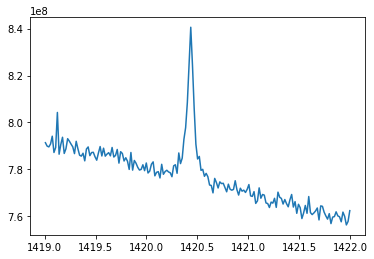

In [35]:
plt.plot(f,p[0]+p[1]+p[2]+p[3])

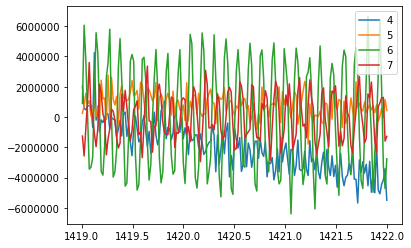

In [36]:
plt.plot(f,p[4],label='4')
plt.plot(f,p[5],label='5')
plt.plot(f,p[6],label='6')
plt.plot(f,p[7],label='7')
plt.legend()


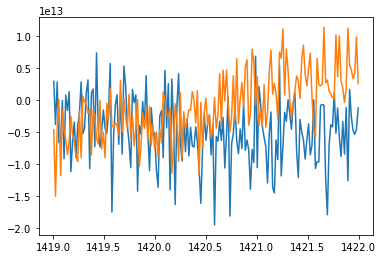

In [37]:
plt.plot(f,p[4]*p[5])
plt.plot(f,p[6]*p[7])

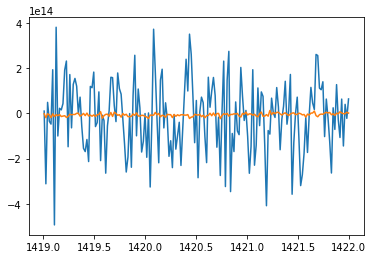

In [38]:
plt.plot(f,p[8])
plt.plot(f,p[4]*p[5]+p[6]*p[7])

(-0.04113929556289724+0.09593120376182988j)


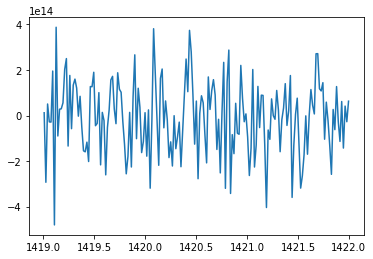

In [44]:
plt.plot(f,p[8]-(p[4]*p[5]+p[6]*p[7]))
rx = p[8]-(p[4]*p[5]+p[6]*p[7])
print (rx.mean()/np.sqrt(rx.var()))

In [ ]:
(r.datad0c1[:20],
r.datad0c2[:20],
r.datad1c1[:20],
r.datad1c2[:20])